# 3.1 퍼셉트론에서 신경망으로

## 3.1.1 신경망의 예
* 입력층 : 가장 왼쪽 줄
* 출력층 : 맨 오른쪽 줄
* 은닉층 : 중간 줄

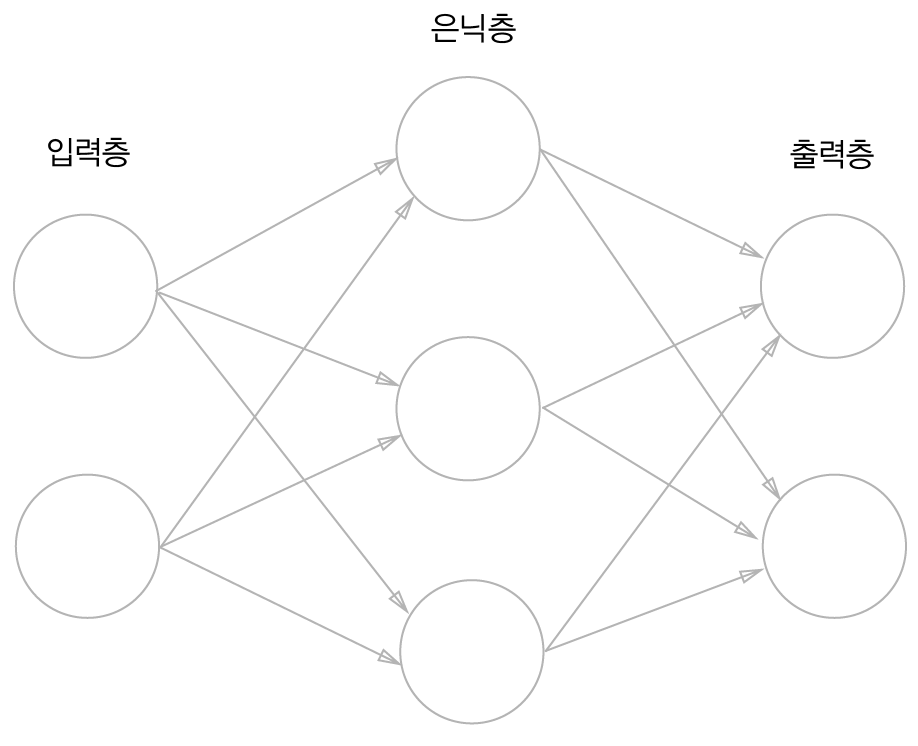

In [2]:
# 신경망의 예
from IPython.display import Image
Image("images/fig 3-1.png")

## 3.1.2 퍼셉트론 복습

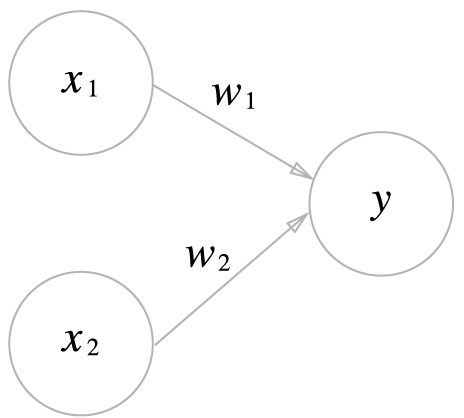

In [3]:
# 퍼셉트론 복습
Image("images/fig 3-2.png")

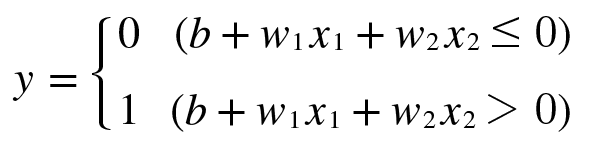

In [4]:
# 퍼셉트론 수식
Image("images/e 3.1.png")

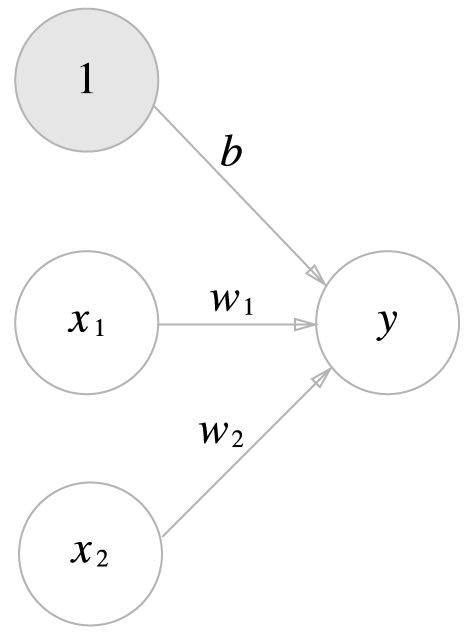

In [5]:
# 편향을 명시한 퍼셉트론 
Image("images/fig 3-3.png")

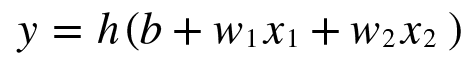

In [6]:
# 퍼셉트론 수식을 하나의 식으로 
Image("images/e 3.2.png")

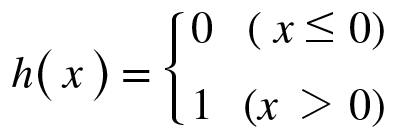

In [7]:
# 퍼셉트론 수식의 h함수 정의(나중에 활성화 함수로 정의)
Image("images/e 3.3.png")

## 3.1.3 활성화 함수의 등장
* 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수

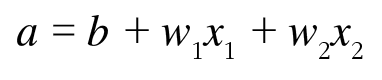

In [8]:
# 두개의 함수로
Image("images/e 3.4.png")

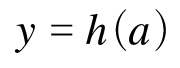

In [9]:
Image("images/e 3.5.png")

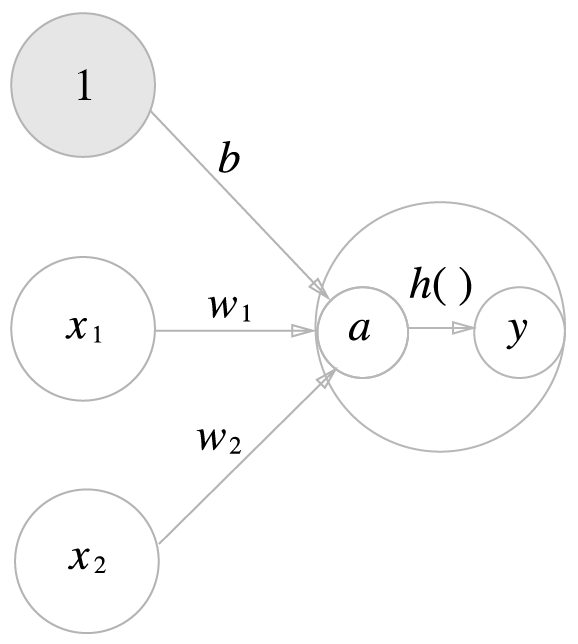

In [10]:
# 활성화 함수의 처리 
Image("images/fig 3-4.png")

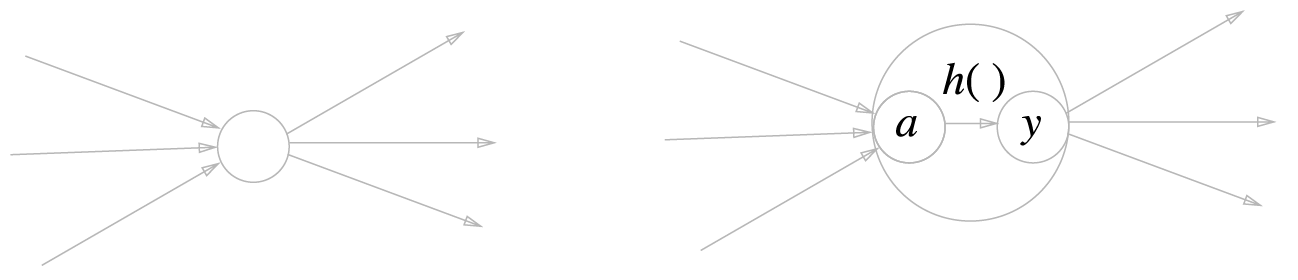

In [11]:
# 일반적인 뉴런과 활성화 처리 과정을 명시한 뉴런
# 활성화 함수가 퍼셉트론에서 신경망으로 가기 위한 길잡이
Image("images/fig 3-5.png")

# 3.2 활성화 함수
* 계단 함수(step function): 임계값을 경계로 출력을 바꾸는 함수
* 퍼셉트론에서는 활성화 함수로 계단 함수 이용
* 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나가는 열쇠

## 3.2.1 시그모이드 함수

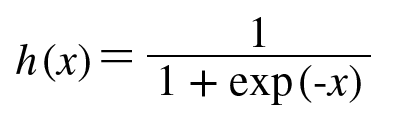

In [13]:
# 시그모이드 함수 
# 퍼셉트론롸 신경망의 주된 차이는 활성화 함수뿐
Image("images/e 3.6.png")

## 3.2.2 계단 함수 구현하기

In [14]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [15]:
# 위 함수는 넘파이 배열을 인수로 넣을 수 없어서 재정의
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [16]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [17]:
y = x > 0
y

array([False,  True,  True])

In [19]:
y = y.astype(int)  # 배열의 자료형 변환
y

array([0, 1, 1])

## 3.2.3 계단 함수의 그래프

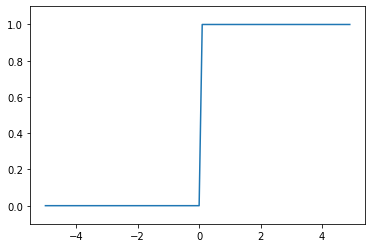

In [21]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [25]:
# 브로드캐스트 기능
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [26]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

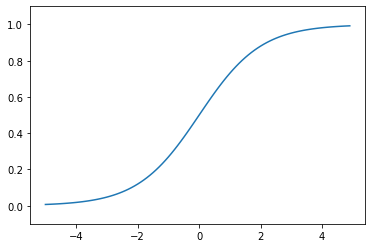

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.5 시그모이드 함수와 계단 함수 비교

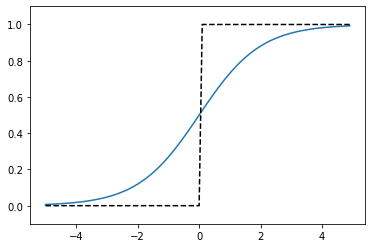

In [29]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x,y1)
plt.plot(x,y2,'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## 3.2.6 비선형 함수
* 신경망에서는 활성화 함수로 비선형 함수 사용

## 3.2.7 ReLU 함수

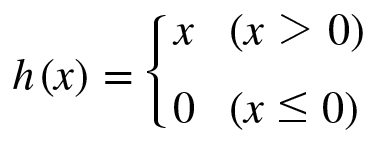

In [30]:
# ReLU 함수 수식
Image("images/e 3.7.png")

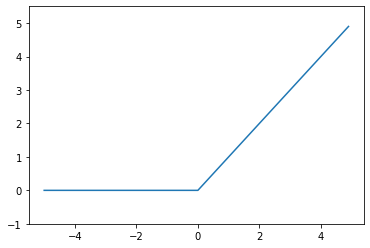

In [31]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.0, 5.5)
plt.show()

# 3.3 다차원 배열의 계산
* 다차원 배열을 사용한 계산법 숙달

## 3.3.1 다차원 배열
* 다차원 배열도 그 기본은 '숫자의 집합'
* 배열의 차원수 : np.ndim()
* 배열의 형상 : shape
* shape : 튜플을 반환 

In [32]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [33]:
np.ndim(A)

1

In [34]:
A.shape

(4,)

In [35]:
A.shape[0]

4

In [36]:
A.shape[1]

IndexError: tuple index out of range

In [37]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [38]:
np.ndim(B)

2

In [39]:
B.shape

(3, 2)

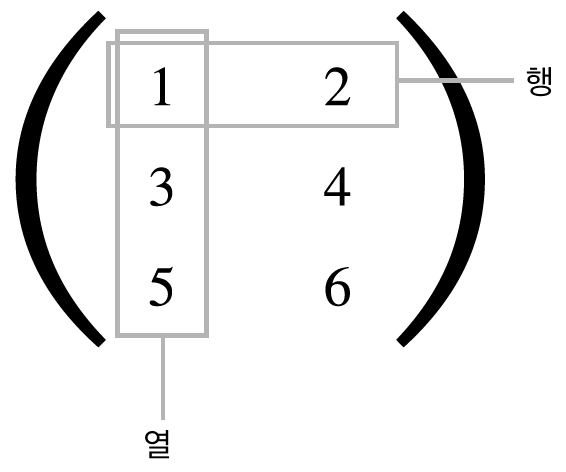

In [40]:
# 2 차원 배열(행렬)의 행(가로)과 열(세로)
# 2 차원 배열은 특히 행렬(matrix)
# 가로 방향 : 행(row)
# 세로 방향 : 열(column)
# 1 차원 배열 : 벡터
# 일반 값은 : 스칼라 
Image("images/fig 3-10.png")

## 3.3.2 행렬의 곱
* 사칙연산( + - * ÷ ) --> 원소별 연산

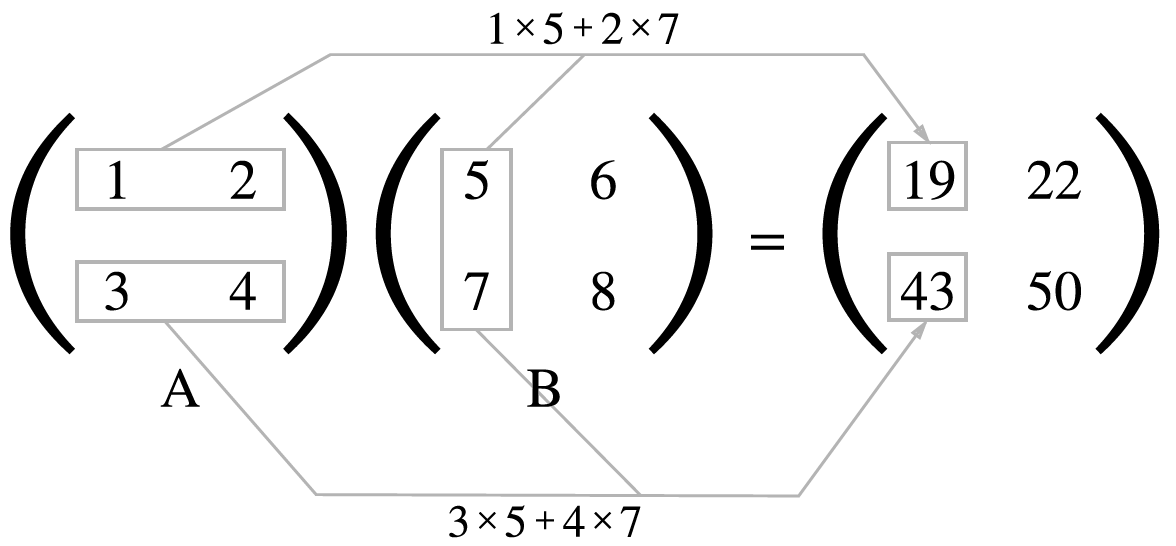

In [41]:
# 행렬의 곱 계산 방법
Image("images/fig 3-11.png")

In [42]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [43]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [44]:
# 두 행렬의 곱은 넘파이 함수 np.dot()으로 계산
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [45]:
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [46]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [48]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [49]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [50]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [51]:
A.shape

(2, 3)

In [52]:
np.dot(C,A)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [54]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

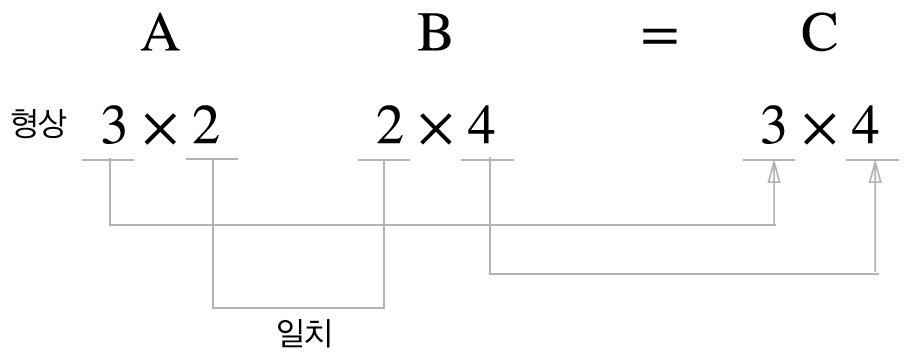

In [55]:
# 행렬의 곱에서는 대응하는 차원의 원소 수를 일치시켜라.
Image("images/fig 3-12.png")

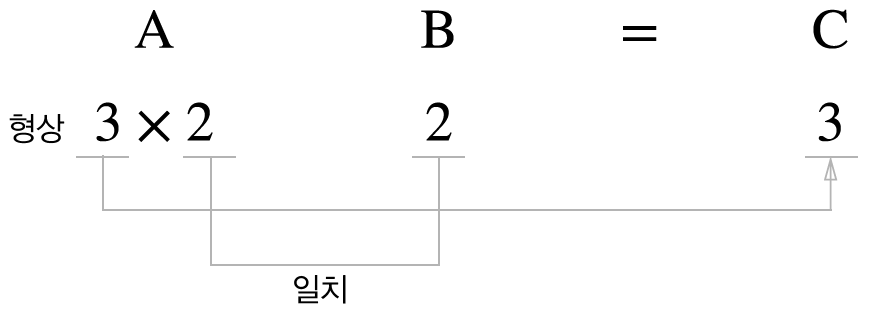

In [61]:
# A가 2차원 행렬, B가 1 차원 배열일 때도 대응하는 차원의 원소를 일치시켜라.
Image("images/fig 3-13.png")

In [56]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [57]:
B = np.array([7,8])
B.shape

(2,)

In [59]:
np.dot(A,B)

array([23, 53, 83])

In [60]:
np.dot(B,A)

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

## 3.3.3 신경망에서의 행렬 곱

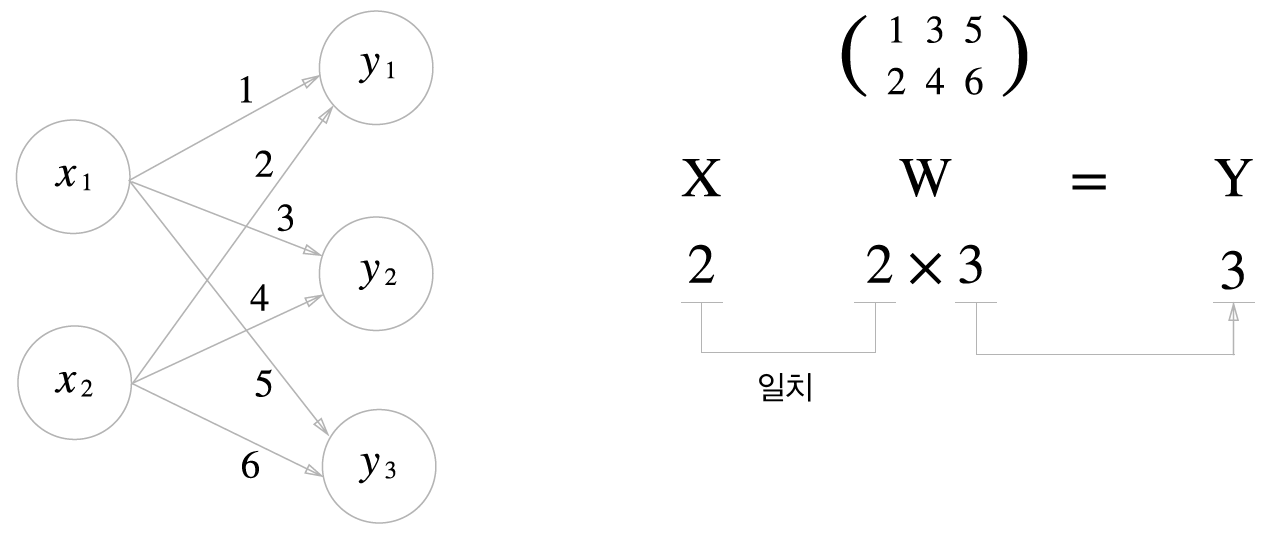

In [62]:
# 행렬의 곱으로 신경망의 계산
Image("images/fig 3-14.png")

In [63]:
X = np.array([1,2])
X.shape

(2,)

In [64]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [69]:
W.shape

(2, 3)

In [70]:
np.transpose(W).shape

(3, 2)

In [71]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


In [72]:
Z = np.array([1,2,3])
Z.shape

(3,)

In [74]:
np.dot(W,Z).shape

(2,)

# 3.4 3층 신경망 구현하기

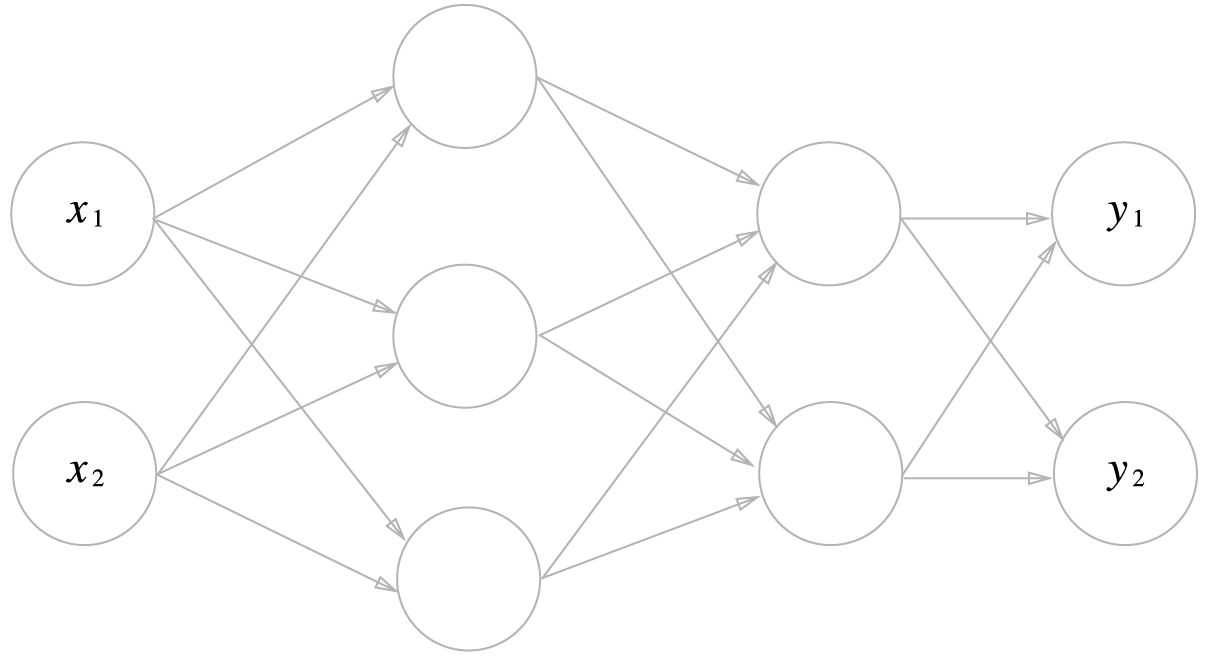

In [75]:
# 3층 신경망
Image("images/fig 3-15.png")

## 3.4.1 표기법 설명

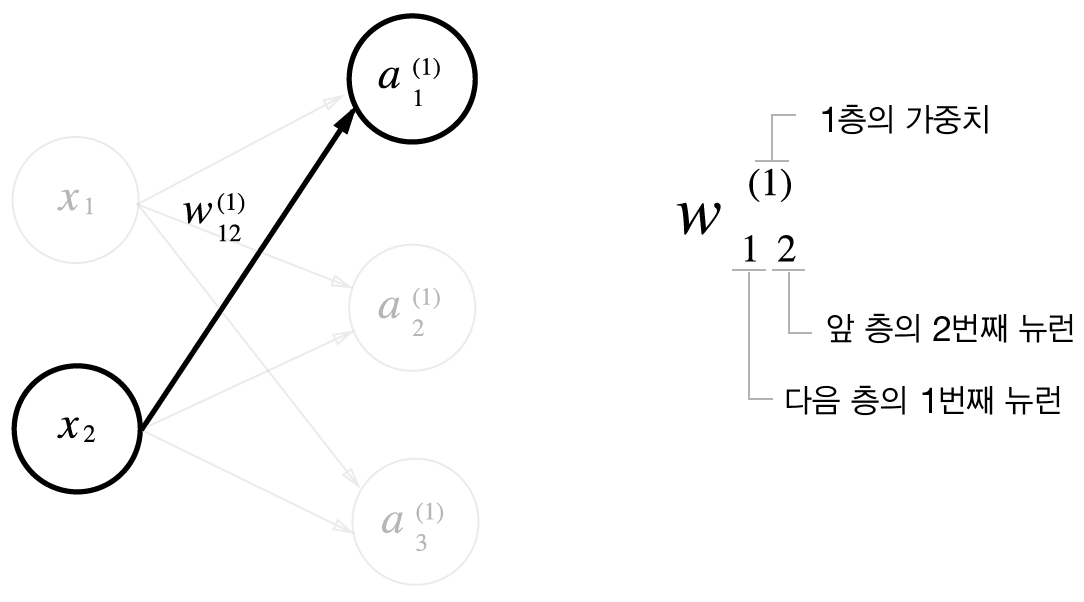

In [76]:
Image("images/fig 3-16.png")

## 3.4.2 각 층의 신호 전달 구현하기

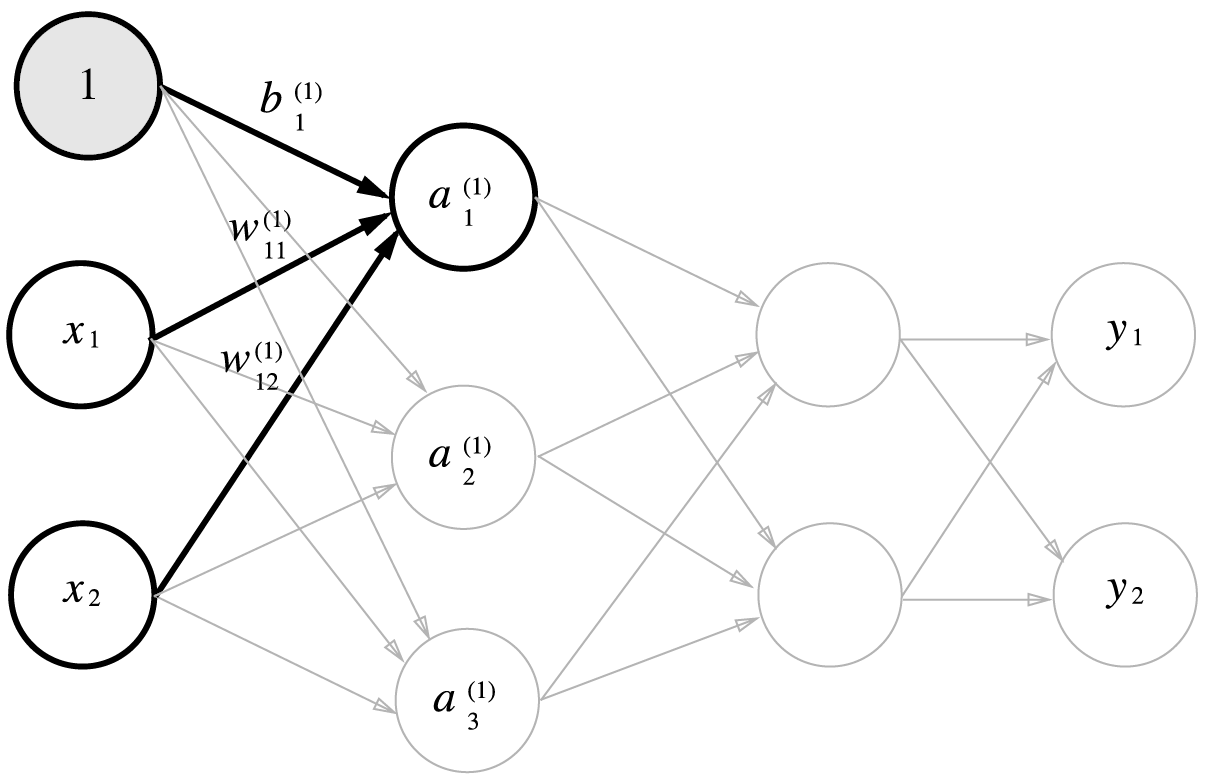

In [77]:
Image("images/fig 3-17.png")